In [1]:
# ============================================================
# 02_Exploratory_Analysis.ipynb
# Simplified and focused Exploratory Data Analysis
# ============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (8,5)

In [2]:
# -----------------------------
# Step 1: Load cleaned dataset
# -----------------------------
data_path = '../outputs/cleaned_data.csv'  # output from dp2.ipynb
df = pd.read_csv(data_path, low_memory=False)

print("Dataset loaded successfully.")
print("Shape:", df.shape)
df.head(3)

Dataset loaded successfully.
Shape: (2522362, 80)


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Attack_Binary
0,54865,3.0,2,0,12,0,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,BENIGN
1,55054,109.0,1,1,6,6,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,BENIGN
2,55055,52.0,1,1,6,6,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,BENIGN


In [3]:
# -----------------------------
# Step 2: Basic Overview
# -----------------------------
print("Columns:", len(df.columns))
print("Numeric columns:", len(df.select_dtypes(include=np.number).columns))
print("Object columns:", len(df.select_dtypes(exclude=np.number).columns))

label_col = 'Label' if 'Label' in df.columns else [c for c in df.columns if 'label' in c.lower()][0]
print("Detected Label column:", label_col)

print("\nUnique labels (top 15):")
print(df[label_col].value_counts().head(15))

Columns: 80
Numeric columns: 78
Object columns: 2
Detected Label column: Label

Unique labels (top 15):
Label
BENIGN                        2096484
DOS HULK                       172849
DDOS                           128016
PORTSCAN                        90819
DOS GOLDENEYE                   10286
FTP-PATATOR                      5933
DOS SLOWLORIS                    5385
DOS SLOWHTTPTEST                 5228
SSH-PATATOR                      3219
BOT                              1953
WEB ATTACK � BRUTE FORCE         1470
WEB ATTACK � XSS                  652
INFILTRATION                       36
WEB ATTACK � SQL INJECTION         21
HEARTBLEED                         11
Name: count, dtype: int64


C:\Users\Yash Verma\AppData\Local\Temp\ipykernel_14568\2066781802.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Attack_Binary', data=df, palette='viridis')


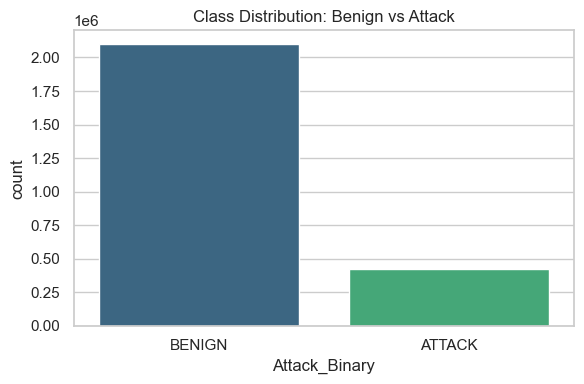

Attack_Binary
BENIGN    83.12
ATTACK    16.88
Name: proportion, dtype: float64


In [4]:
# -----------------------------
# Step 3: Attack vs Benign Distribution
# -----------------------------
if 'Attack_Binary' not in df.columns:
    df['Attack_Binary'] = df[label_col].apply(lambda x: 'BENIGN' if 'BENIGN' in str(x).upper() else 'ATTACK')

plt.figure(figsize=(6,4))
sns.countplot(x='Attack_Binary', data=df, palette='viridis')
plt.title("Class Distribution: Benign vs Attack")
plt.tight_layout()
plt.savefig('../outputs/class_distribution_simple.png')
plt.show()

print(df['Attack_Binary'].value_counts(normalize=True).mul(100).round(2))

C:\Users\Yash Verma\AppData\Local\Temp\ipykernel_14568\3421881656.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=attack_types.index, x=attack_types.values, palette='magma')
C:\Users\Yash Verma\AppData\Local\Temp\ipykernel_14568\3421881656.py:13: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Yash Verma\AppData\Local\Temp\ipykernel_14568\3421881656.py:14: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from font(s) Arial.
  plt.savefig('../outputs/top_attack_types_simple.png')
q:\MiniConda\envs\dsc\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


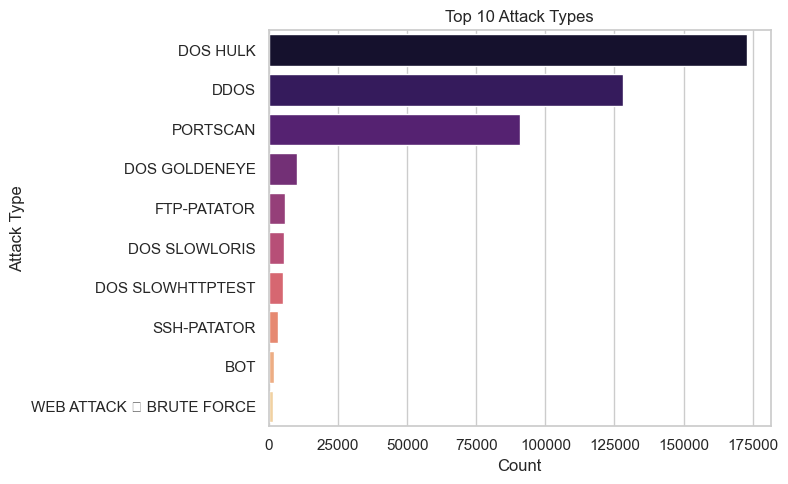

In [5]:
# -----------------------------
# Step 4: Attack Type Breakdown
# -----------------------------
attack_types = (
    df[df['Attack_Binary']=='ATTACK'][label_col]
    .value_counts().head(10)
)
plt.figure(figsize=(8,5))
sns.barplot(y=attack_types.index, x=attack_types.values, palette='magma')
plt.title("Top 10 Attack Types")
plt.xlabel("Count")
plt.ylabel("Attack Type")
plt.tight_layout()
plt.savefig('../outputs/top_attack_types_simple.png')
plt.show()


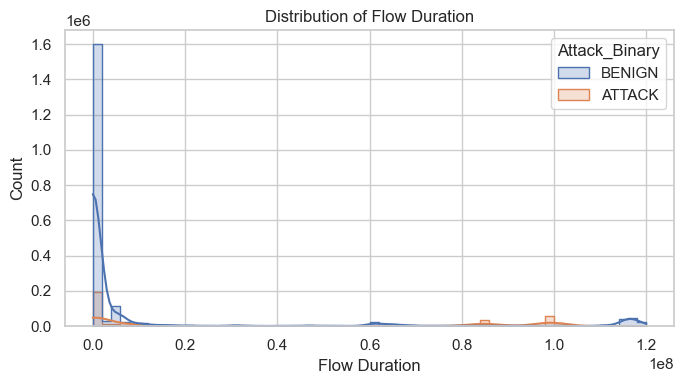

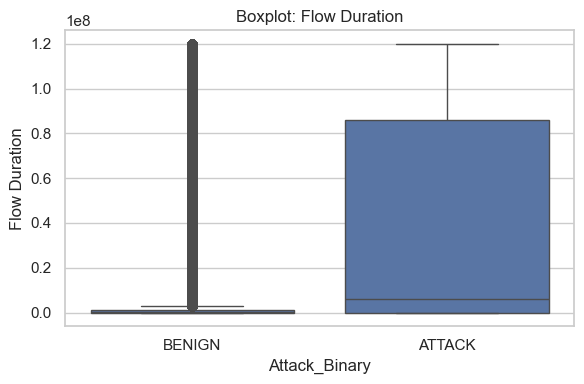

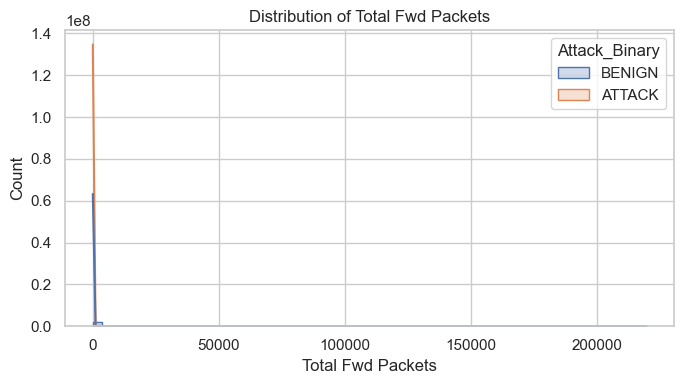

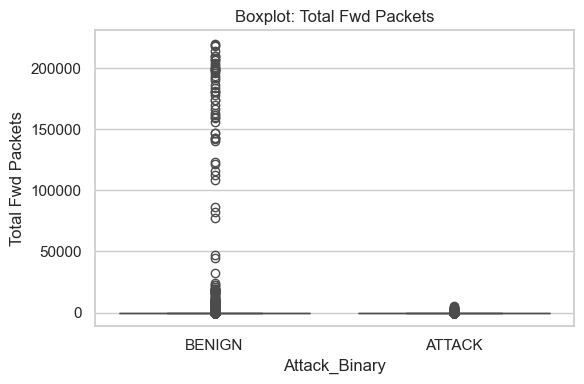

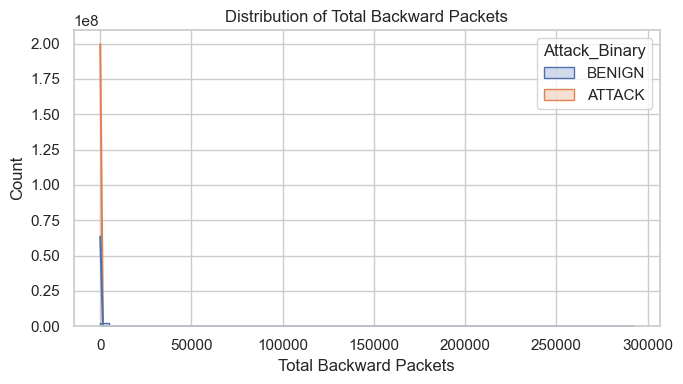

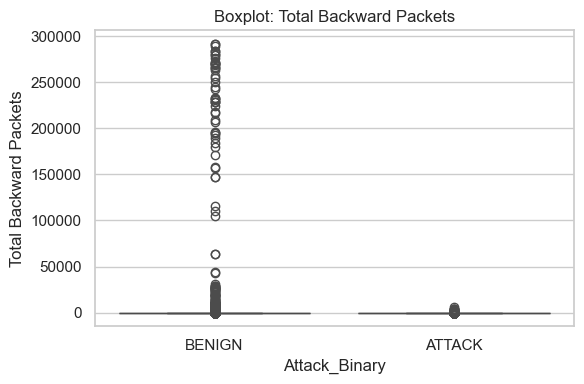

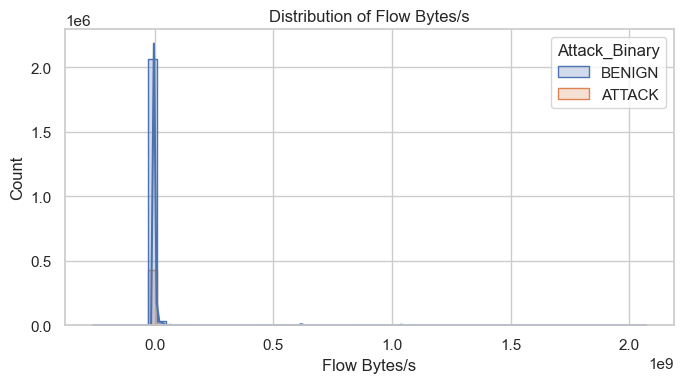

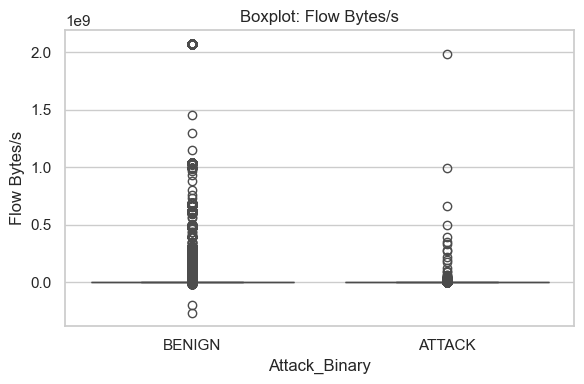

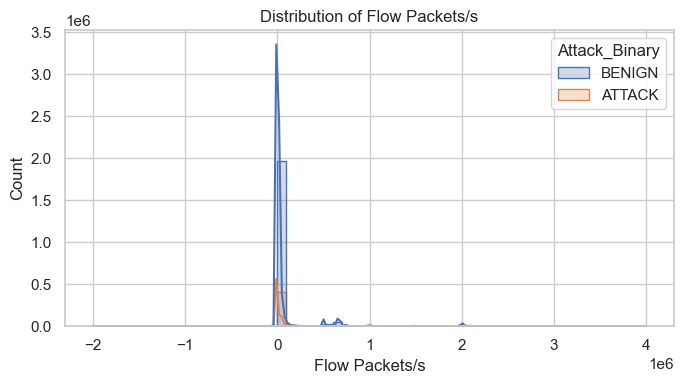

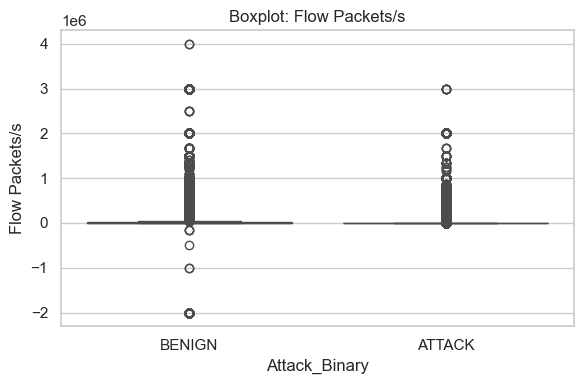

In [6]:
# -----------------------------
# Step 5: Key Feature Distributions
# -----------------------------
key_features = [
    'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets',
    'Flow Bytes/s', 'Flow Packets/s'
]

for col in key_features:
    if col in df.columns:
        plt.figure(figsize=(7,4))
        sns.histplot(data=df, x=col, hue='Attack_Binary', bins=60, kde=True, element='step')
        plt.title(f"Distribution of {col}")
        plt.tight_layout()
        plt.savefig(f'../outputs/distribution_{col.replace("/", "_")}.png')
        plt.show()

        plt.figure(figsize=(6,4))
        sns.boxplot(x='Attack_Binary', y=col, data=df)
        plt.title(f"Boxplot: {col}")
        plt.tight_layout()
        plt.savefig(f'../outputs/boxplot_{col.replace("/", "_")}.png')
        plt.show()


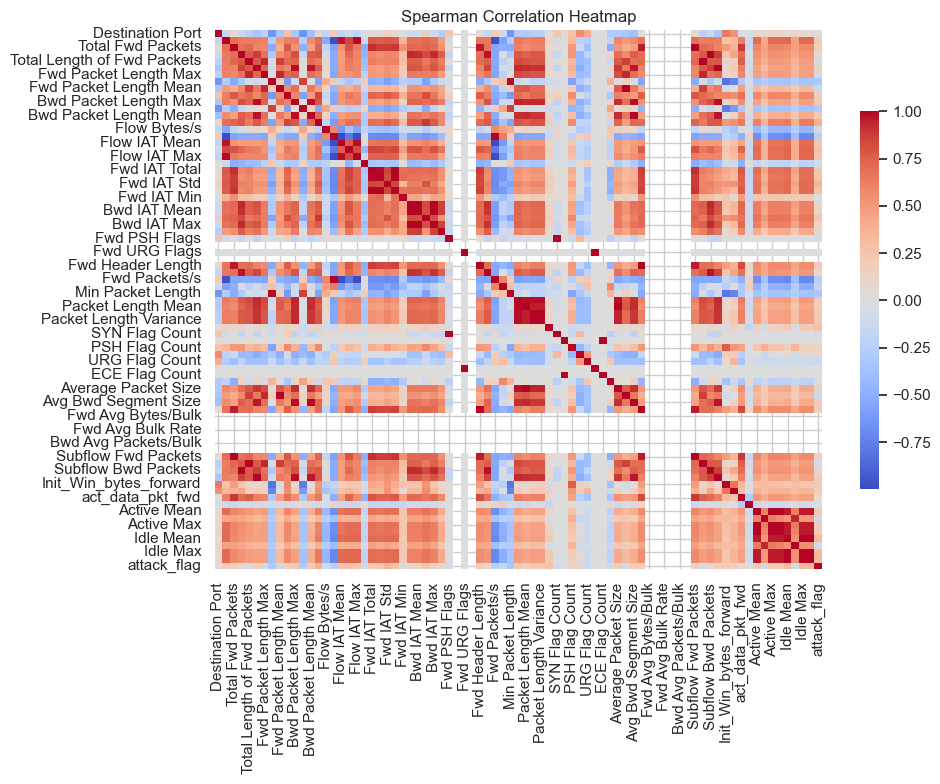

Top 10 correlated features with Attack Flag:
attack_flag              1.000000
Bwd Packet Length Std    0.378341
Fwd IAT Std              0.357261
Idle Max                 0.332603
Idle Mean                0.331428
Idle Min                 0.328147
Flow IAT Std             0.275182
FIN Flag Count           0.271440
Fwd IAT Max              0.264390
Fwd IAT Mean             0.257094
Name: attack_flag, dtype: float64


In [7]:
# -----------------------------
# Step 6: Correlation Analysis
# -----------------------------
df['attack_flag'] = df['Attack_Binary'].map({'BENIGN':0, 'ATTACK':1})

num_cols = df.select_dtypes(include=np.number).columns
corr = df[num_cols].corr(method='spearman')

plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap='coolwarm', center=0, cbar_kws={'shrink':0.7})
plt.title("Spearman Correlation Heatmap")
plt.tight_layout()
plt.savefig('../outputs/correlation_heatmap_simple.png')
plt.show()

# Top correlated features with attack
corr_with_attack = corr['attack_flag'].sort_values(ascending=False)
print("Top 10 correlated features with Attack Flag:")
print(corr_with_attack.head(10))
corr_with_attack.head(10).to_csv('../outputs/feature_correlation_simple.csv')


In [8]:
# -----------------------------
# Step 7: Feature Summary Table
# -----------------------------
summary_features = [f for f in key_features if f in df.columns]
feature_summary = df.groupby('Attack_Binary')[summary_features].agg(['mean','median','std']).T
feature_summary.to_csv('../outputs/feature_summary_simple.csv')
display(feature_summary.head(15))

Attack_Binary                        ATTACK        BENIGN
Flow Duration          mean    3.838590e+07  1.215196e+07
                       median  6.027888e+06  3.950750e+04
                       std     4.463577e+07  3.117482e+07
Total Fwd Packets      mean    4.896607e+00  1.136909e+01
                       median  4.000000e+00  2.000000e+00
                       std     2.105298e+01  8.710553e+02
Total Backward Packets mean    4.126193e+00  1.307727e+01
                       median  5.000000e+00  2.000000e+00
                       std     1.890787e+01  1.158917e+03
Flow Bytes/s           mean    1.061845e+05  1.674658e+06
                       median  1.433001e+02  4.260036e+03
                       std     3.877561e+06  2.907633e+07
Flow Packets/s         mean    1.645385e+04  5.352110e+04
                       median  1.124330e+00  8.505571e+01
                       std     8.342875e+04  2.184672e+05

In [9]:
# -----------------------------
# Step 8: EDA Findings Summary
# -----------------------------
eda_summary = []

eda_summary.append(f"Total rows: {df.shape[0]}, Columns: {df.shape[1]}")
benign_ratio = df['Attack_Binary'].value_counts(normalize=True).get('BENIGN', 0)
eda_summary.append(f"Dataset is imbalanced: ~{benign_ratio*100:.2f}% Benign, {(1-benign_ratio)*100:.2f}% Attack.")
eda_summary.append("Top correlated features with attack_flag:")
eda_summary.extend([f"- {f}: {r:.3f}" for f, r in corr_with_attack.head(5).items()])
eda_summary.append("Refer to boxplots for visible differences in feature distributions.")

summary_text = "\n".join(eda_summary)
print("\n=== EXPLORATORY FINDINGS ===\n")
print(summary_text)

with open('../outputs/eda_findings_summary.txt','w') as f:
    f.write(summary_text)
print("\n✅ Summary saved to eda_findings_summary.txt")


=== EXPLORATORY FINDINGS ===

Total rows: 2522362, Columns: 81
Dataset is imbalanced: ~83.12% Benign, 16.88% Attack.
Top correlated features with attack_flag:
- attack_flag: 1.000
- Bwd Packet Length Std: 0.378
- Fwd IAT Std: 0.357
- Idle Max: 0.333
- Idle Mean: 0.331
Refer to boxplots for visible differences in feature distributions.

✅ Summary saved to eda_findings_summary.txt
